In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
df

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...,...
640835,359783,409,6,2013-10-26,483,1,0,0,0,4553
640836,152315,97,1,2014-04-14,987,1,1,0,0,12307
640837,117952,987,1,2014-07-07,925,1,0,0,0,6800
640838,435829,1084,4,2014-06-12,725,1,0,0,0,5344


In [4]:
df.dtypes

Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [5]:
df.isna().sum()

Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,640840.0,355990.675084,205536.290268,0.0,178075.75,355948.5,533959.25,712044.0
store_ID,640840.0,558.211348,321.878521,1.0,280.00,558.0,837.00,1115.0
day_of_week,640840.0,4.000189,1.996478,1.0,2.00,4.0,6.00,7.0
nb_customers_on_day,640840.0,633.398577,464.094416,0.0,405.00,609.0,838.00,5458.0
open,640840.0,0.830185,0.375470,0.0,1.00,1.0,1.00,1.0
promotion,640840.0,0.381718,0.485808,0.0,0.00,0.0,1.00,1.0
school_holiday,640840.0,0.178472,0.382910,0.0,0.00,0.0,0.00,1.0
sales,640840.0,5777.469011,3851.338083,0.0,3731.00,5746.0,7860.00,41551.0


In [7]:
df['Unnamed: 0'].duplicated().sum()

0

In [8]:
df['state_holiday'].value_counts()

state_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64

In [9]:
df['state_holiday'] = np.where(df['state_holiday'].isin(['a','b','c']) , 1 , df['state_holiday'])

In [10]:
df['state_holiday'].value_counts()

state_holiday
0    621160
1     19680
Name: count, dtype: int64

In [11]:
df['state_holiday'] =  pd.to_numeric(df['state_holiday'], errors='coerce')

In [12]:
df.dtypes

Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday           int64
school_holiday          int64
sales                   int64
dtype: object

In [13]:
if df['date'].dtype == 'object':

    df['date'] = pd.to_datetime(df['date'])

# Extract the month from the 'date' column and create a new 'month' column

df['month'] = df['date'].dt.month

In [14]:
df

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,month
0,425390,366,4,2013-04-18,517,1,0,0,0,4422,4
1,291687,394,6,2015-04-11,694,1,0,0,0,8297,4
2,411278,807,4,2013-08-29,970,1,1,0,0,9729,8
3,664714,802,2,2013-05-28,473,1,1,0,0,6513,5
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882,10
...,...,...,...,...,...,...,...,...,...,...,...
640835,359783,409,6,2013-10-26,483,1,0,0,0,4553,10
640836,152315,97,1,2014-04-14,987,1,1,0,0,12307,4
640837,117952,987,1,2014-07-07,925,1,0,0,0,6800,7
640838,435829,1084,4,2014-06-12,725,1,0,0,0,5344,6


In [15]:
df['day'] = df['date'].dt.day

In [16]:
df

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,month,day
0,425390,366,4,2013-04-18,517,1,0,0,0,4422,4,18
1,291687,394,6,2015-04-11,694,1,0,0,0,8297,4,11
2,411278,807,4,2013-08-29,970,1,1,0,0,9729,8,29
3,664714,802,2,2013-05-28,473,1,1,0,0,6513,5,28
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...
640835,359783,409,6,2013-10-26,483,1,0,0,0,4553,10,26
640836,152315,97,1,2014-04-14,987,1,1,0,0,12307,4,14
640837,117952,987,1,2014-07-07,925,1,0,0,0,6800,7,7
640838,435829,1084,4,2014-06-12,725,1,0,0,0,5344,6,12


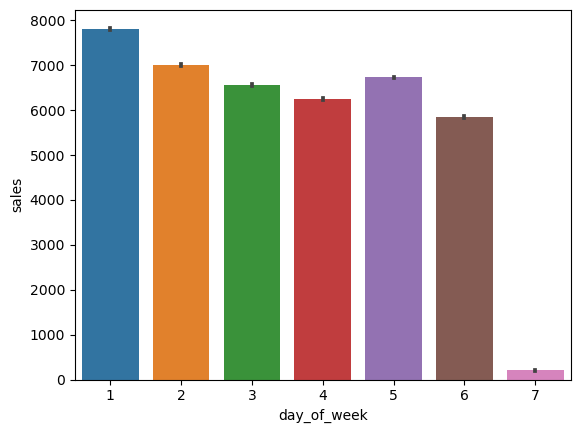

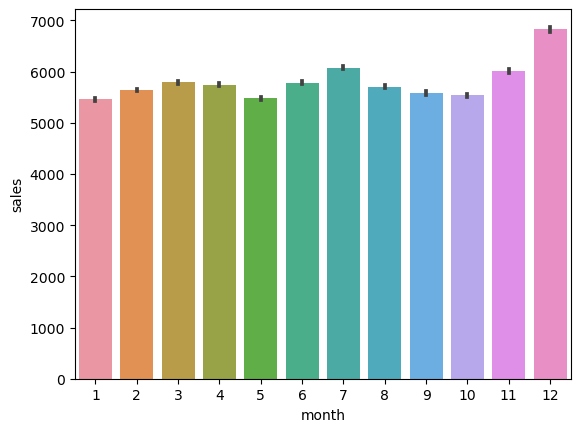

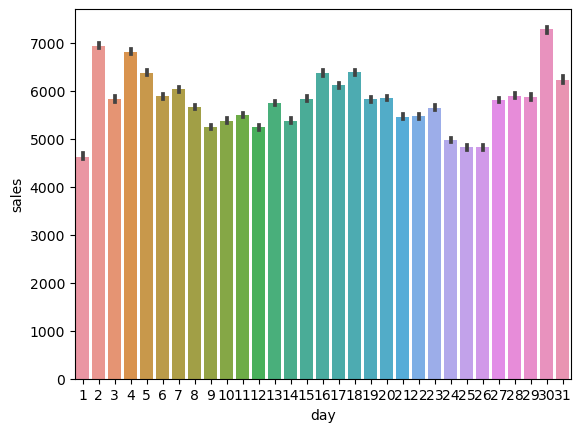

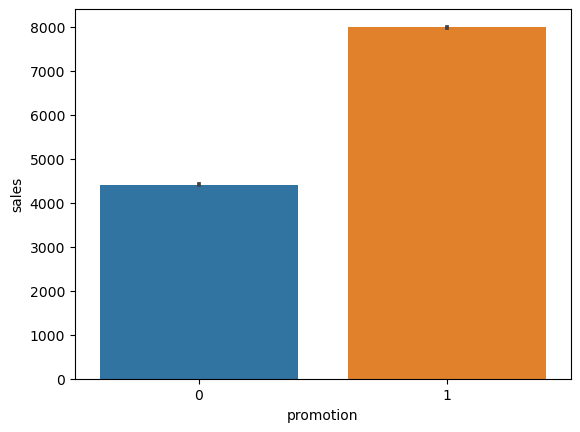

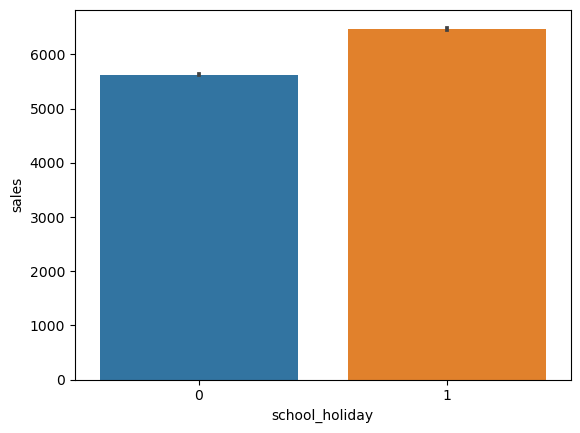

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['day_of_week','month','day','promotion','school_holiday']

for column in columns:
    sns.barplot(x=column, y="sales", data=df) 
    plt.show() 

In [18]:
df_store_ID = df.groupby(['store_ID']).agg({'sales':'mean'})

In [19]:
df_store_ID.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,1115.0,5765.794268,2047.821608,2230.757042,4412.887587,5468.422559,6633.284825,20780.097479


In [20]:
df_num = df.select_dtypes(include = np.number)
df_num

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,month,day
0,425390,366,4,517,1,0,0,0,4422,4,18
1,291687,394,6,694,1,0,0,0,8297,4,11
2,411278,807,4,970,1,1,0,0,9729,8,29
3,664714,802,2,473,1,1,0,0,6513,5,28
4,540835,726,4,1068,1,1,0,0,10882,10,10
...,...,...,...,...,...,...,...,...,...,...,...
640835,359783,409,6,483,1,0,0,0,4553,10,26
640836,152315,97,1,987,1,1,0,0,12307,4,14
640837,117952,987,1,925,1,0,0,0,6800,7,7
640838,435829,1084,4,725,1,0,0,0,5344,6,12


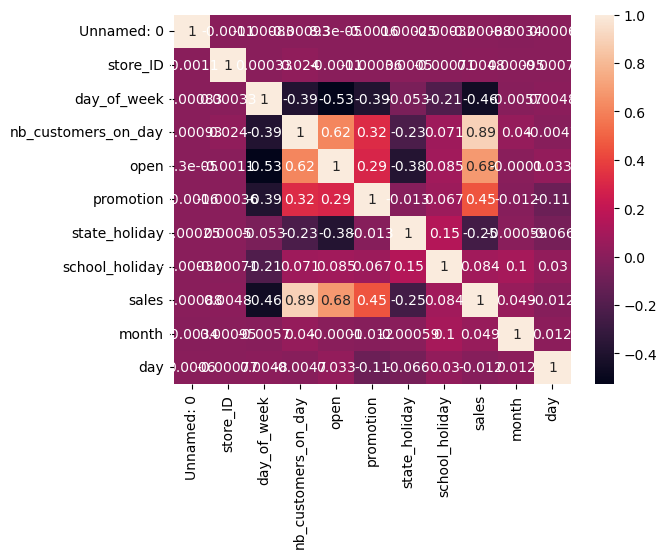

In [21]:
correlations_matrix = df_num.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [22]:
# Train / test split

from sklearn.model_selection import train_test_split

X = df.drop(['sales', 'Unnamed: 0','date', 'open'], axis = 1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()

model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train_scaled, y_train, cv=5))
    scores[model_name] = mean_score
print(scores)

{'Decision Tree Regressor': 0.9025758876734837, 'Linear Regression': 0.8451368738442007, 'KNN': 0.8707027717962171}


In [25]:
# validation on X_val and y_val we do without cross validation:

from sklearn.metrics import mean_squared_error

val_scores = {}
for model, model_name in zip(model_pipeline, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    val_scores[model_name] = rmse

print(val_scores)

{'Decision Tree Regressor': 1144.2720851640902, 'Linear Regression': 1528.488823865148, 'KNN': 1384.6728229902296}


In [26]:
def data_cleaning (df):
    
    # Combine categories in the state_holiday column
    
    df['state_holiday'] = np.where(df['state_holiday'].isin(['a','b','c']) , 1 , df['state_holiday'])
    df['state_holiday'] = pd.to_numeric(df['state_holiday'], errors='coerce')
    
    # Changing the datetime
    
    if df['date'].dtype == 'object':

        df['date'] = pd.to_datetime(df['date'])

    # Extract the month from the 'date' column and create a new 'month' and 'day' column

    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    
    return df

In [27]:
# from sklearn.model_selection import RandomizedSearchCV


# random_grid = {'max_depth': [3,4,5,6,7,8,9,10,None],
#                'criterion': ['squared_error','absolute_error'],
#                'min_samples_split': [2,3,4,5,6,7,8,9,10],
#                'min_samples_leaf': [2,3,4,5,6,7,8,9,10],
#                'max_features': [3,4,5,6,None]}

In [28]:
# model = DecisionTreeRegressor()
# random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter=100, cv = 5, n_jobs=-1)

In [29]:
# %%time
# random_search.fit(X_train_scaled,y_train)

In [30]:
model = DecisionTreeRegressor(max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf =10,
                             max_features = None)

In [31]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1012.4428853856574

In [32]:
y_pred = model1.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1144.2720851640902

## Make predictions on new data

In [33]:
df_pred = pd.read_csv('validation_for_students.csv')

In [36]:
df_pred.columns=df_pred.columns.str.lower()
df_pred

,true_index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,7,764,4,2013-12-26,0,0,0,c,1
1,19,22,3,2013-05-22,449,1,0,0,1
2,31,1087,6,2013-06-29,622,1,0,0,0
3,45,139,6,2013-08-17,314,1,0,0,0
4,56,568,1,2014-04-07,356,1,0,0,0
...,...,...,...,...,...,...,...,...,...
71200,712004,217,2,2015-01-13,633,1,1,0,0
71201,712018,604,3,2014-04-30,743,1,1,0,0
71202,712020,1021,5,2014-07-18,1852,1,1,0,1
71203,712023,28,3,2014-08-27,0,0,0,0,1


In [37]:
df_pred = data_cleaning(df_pred)

In [41]:
df_pred = df_pred.rename(columns={'store_id':'store_ID'})

In [42]:
df_pred

,true_index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,month,day
0,7,764,4,2013-12-26,0,0,0,1,1,12,26
1,19,22,3,2013-05-22,449,1,0,0,1,5,22
2,31,1087,6,2013-06-29,622,1,0,0,0,6,29
3,45,139,6,2013-08-17,314,1,0,0,0,8,17
4,56,568,1,2014-04-07,356,1,0,0,0,4,7
...,...,...,...,...,...,...,...,...,...,...,...
71200,712004,217,2,2015-01-13,633,1,1,0,0,1,13
71201,712018,604,3,2014-04-30,743,1,1,0,0,4,30
71202,712020,1021,5,2014-07-18,1852,1,1,0,1,7,18
71203,712023,28,3,2014-08-27,0,0,0,0,1,8,27


In [43]:
X_pred = df_pred.drop(['true_index','date', 'open'], axis = 1)
X_pred_scaled = scaler.transform(X_pred)

In [44]:
y_pred_real = model.predict(X_pred_scaled)


In [45]:
y_pred_real

array([    0.        ,  3594.27777778,  6481.4375    , ...,
       15925.33333333,     0.        ,  4721.72727273])

In [53]:
df_pred['sales']=y_pred_real.round(2)

In [54]:
df_pred

,true_index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,month,day,Sales,sales
0,7,764,4,2013-12-26,0,0,0,1,1,12,26,0.00,0.00
1,19,22,3,2013-05-22,449,1,0,0,1,5,22,3594.28,3594.28
2,31,1087,6,2013-06-29,622,1,0,0,0,6,29,6481.44,6481.44
3,45,139,6,2013-08-17,314,1,0,0,0,8,17,4065.71,4065.71
4,56,568,1,2014-04-07,356,1,0,0,0,4,7,3841.90,3841.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71200,712004,217,2,2015-01-13,633,1,1,0,0,1,13,5583.53,5583.53
71201,712018,604,3,2014-04-30,743,1,1,0,0,4,30,7714.29,7714.29
71202,712020,1021,5,2014-07-18,1852,1,1,0,1,7,18,15925.33,15925.33
71203,712023,28,3,2014-08-27,0,0,0,0,1,8,27,0.00,0.00


In [57]:
predictions = df_pred[['true_index','sales']]
predictions

,true_index,Sales
0,7,0.00
1,19,3594.28
2,31,6481.44
3,45,4065.71
4,56,3841.90
...,...,...
71200,712004,5583.53
71201,712018,7714.29
71202,712020,15925.33
71203,712023,0.00


In [58]:
predictions.to_csv('The_three_musketeers.csv', index=False)